> # Multiple Linear Regression

In this notebook, i well predect the price of the house using the Linear Regression model. `without use` any machine learning library.

## 1- Package

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipympl
import pandas as pd

from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib widget

## 2- import data

In [101]:
path = './data/Housing.csv'

data = pd.read_csv(path)

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [102]:
furnishingstatus_map = {
    'furnished' :3,
    'semi-furnished' :2,
    'unfurnished' : 1 
}
boolian_map = {
    'yes':1,
    'no' :0
}

data['furnishingstatus'] = data['furnishingstatus'].map(furnishingstatus_map)
data['mainroad']  =  data['mainroad'].map(boolian_map)
data['guestroom'] = data['guestroom'].map(boolian_map)
data['basement']  =  data['basement'].map(boolian_map)
data['hotwaterheating']  =  data['hotwaterheating'].map(boolian_map)
data['airconditioning'] = data['airconditioning'].map(boolian_map)
data['prefarea']  =  data['prefarea'].map(boolian_map)

x_train = data.values[:,1:]
y_train = data["price"].values

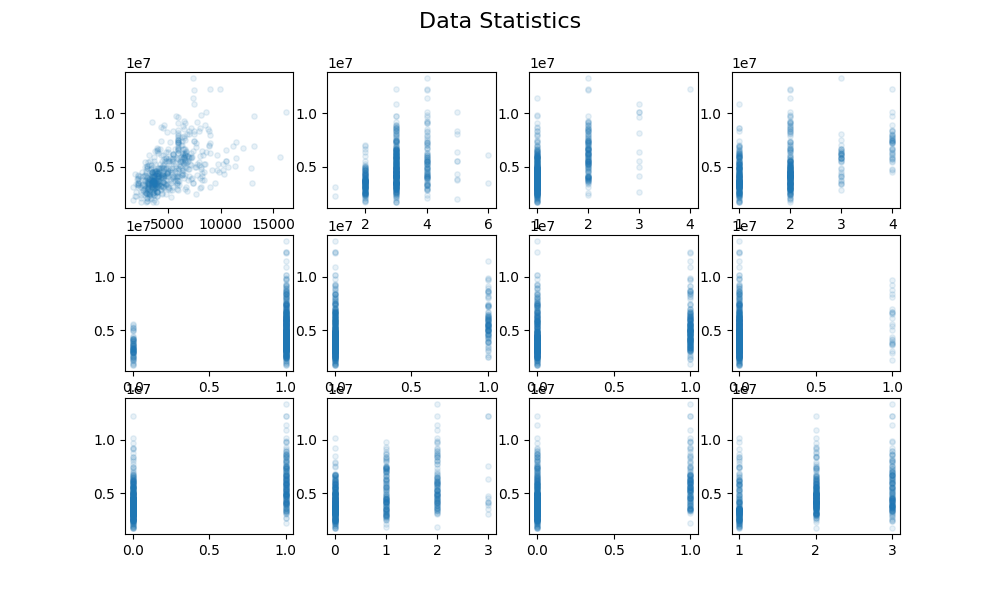

In [103]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Data Statistics', fontsize=16)
 
for i in range(1,13):
    ax = fig.add_subplot(3,4,i)
    ax.scatter(data.iloc[:,i],data['price'], alpha=0.1 ,s=15, label='Price vs '+data.columns[i])


## Scale/normalize the training data

In [104]:
# z = (x - u) / s ==> StandardScaler()

scaler = StandardScaler()
X_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[14550     5     3     3     1     1     1     1     1     3     1     2]
Peak to Peak range by column in Normalized X:[6.71079293 6.78070523 5.97599535 3.46142038 2.87096708 2.61439755
 2.09593682 4.77996621 2.15168089 3.48515059 2.35897582 2.62924776]


## Create and fit the regression model

In [151]:
sgdr = SGDRegressor(max_iter=1000,learning_rate='optimal',alpha=0.2)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(alpha=0.205, learning_rate='optimal')
number of iterations completed: 21, number of weight updates: 11446.0


In [130]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: \033[91mw:\033[0m {w_norm}, \033[91mb:\033[0m{b_norm}")


model parameters: w: [463135.53947242 131006.00369468 438338.05323201 338203.28781265
 155830.03546696 126109.96321004 143319.01070816 153403.69255833
 358114.53959936 237250.93426173 249671.55094258 161945.40983629], b:[4765262.30987142]


In [131]:
y_pred = np.dot(X_norm, w_norm) + b_norm   #! the same of sgdr.predict(X_norm)

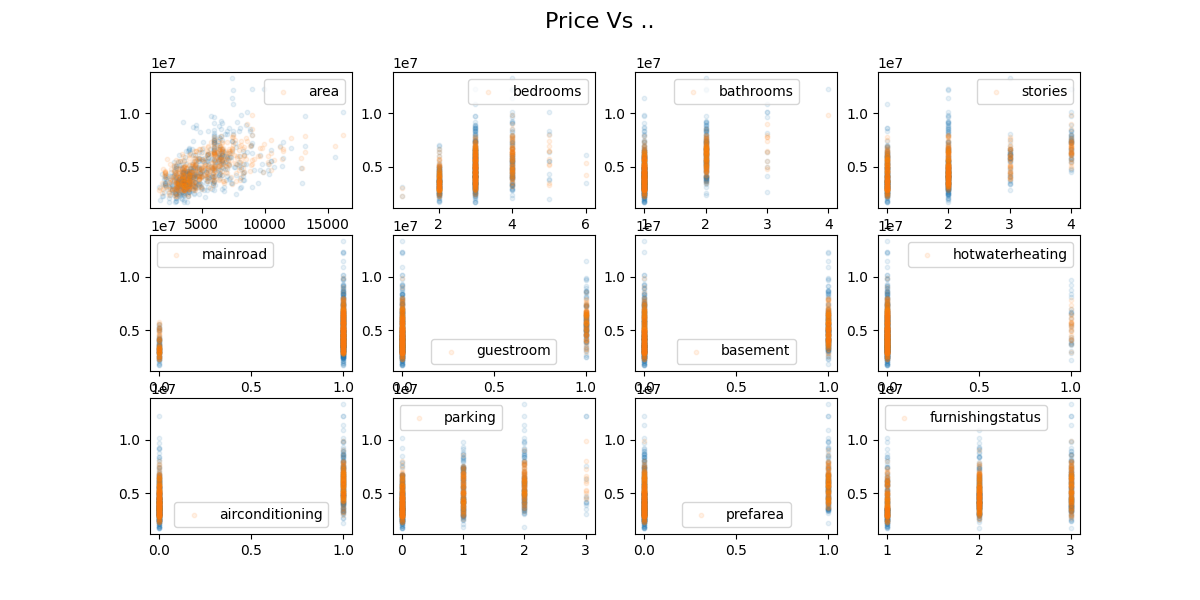

In [127]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Price Vs ..', fontsize=16)

for i in range(1,13):
    ax = fig.add_subplot(3,4,i)
    ax.scatter(data.iloc[:,i],data['price'], alpha=0.1 ,s=10)
    ax.scatter(data.iloc[:,i],y_pred, alpha=0.1 ,s=10, label=data.columns[i])
    ax.legend()

In [152]:
sgdr.score(X_norm, y_train)


0.6741549440836102